In [32]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.python.client import device_lib
from sklearn.utils import shuffle

## load data

In [33]:
path= "./data/"
train_file_0= os.listdir(path+"0_train")
test_file_0= os.listdir(path+ "0_test")
train_file_1= os.listdir(path+"1_train")
test_file_1= os.listdir(path+ "1_test")

## set train data

In [34]:
X_train= 0
check= False

for file in train_file_0:
    img_data= image.load_img(path+"0_train/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)

    if(check== False):
        X_train= img
        check= True
    else:
        X_train= np.vstack((X_train, img))

for file in train_file_1:
    img_data= image.load_img(path+ "1_train/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_train= np.vstack((X_train, img))

In [35]:
y_train= np.array([0]* len(train_file_0))
y_train_1= np.array([1]* len(train_file_1))
y_train= np.append(y_train, y_train_1)

In [36]:
print(X_train.shape)
print(y_train.shape)

(1382, 60, 60, 3)
(1382,)


## set test data

In [37]:
X_test= 0
check= False

for file in test_file_0:
    img_data= image.load_img(path+"0_test/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    
    if(check== False):
        X_test= img
        check= True
    else:
        X_test= np.vstack((X_test, img))
        
for file in test_file_1:
    img_data= image.load_img(path+ "1_test/"+ file)
    img_arr= (image.img_to_array(img_data))/255
    img= img_arr.reshape((1,)+ img_arr.shape)
    X_test= np.vstack((X_test, img))

In [38]:
y_test= np.array([0]* len(test_file_0))
y_test_1= np.array([1]* len(test_file_1))
y_test= np.append(y_test, y_test_1)

In [39]:
print(X_test.shape)
print(y_test.shape)

(200, 60, 60, 3)
(200,)


In [40]:
X_train, y_train= shuffle(X_train, y_train, random_state= 42)
X_test, y_test= shuffle(X_test, y_test, random_state= 42)

## build model

In [41]:
model= keras.models.Sequential()

In [42]:
model.add(keras.layers.Conv2D(64, 10, activation= "relu", padding= "same", input_shape= [60, 60, 3]))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(128, 4, activation= "relu", padding= "same"))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Conv2D(256, 4, activation= "relu", padding= "same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation= "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation= "softmax"))

In [43]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer= "sgd", metrics= ["accuracy"])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 60, 64)        19264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       131200    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 128)       262272    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 256)       524544    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 256)      

## train

In [45]:
history= model.fit(X_train, y_train, epochs= 30)

Epoch 1/30
44/44 [==============================] - 23s 519ms/step - loss: 0.6917 - accuracy: 0.5304
Epoch 2/30
44/44 [==============================] - 23s 515ms/step - loss: 0.6888 - accuracy: 0.5297
Epoch 3/30
44/44 [==============================] - 23s 513ms/step - loss: 0.6858 - accuracy: 0.5485
Epoch 4/30
44/44 [==============================] - 23s 515ms/step - loss: 0.6833 - accuracy: 0.5810
Epoch 5/30
44/44 [==============================] - 24s 551ms/step - loss: 0.6653 - accuracy: 0.6027
Epoch 6/30
44/44 [==============================] - 23s 519ms/step - loss: 0.6633 - accuracy: 0.6035
Epoch 7/30
44/44 [==============================] - 23s 517ms/step - loss: 0.6535 - accuracy: 0.6237
Epoch 8/30
44/44 [==============================] - 23s 515ms/step - loss: 0.6387 - accuracy: 0.6469
Epoch 9/30
44/44 [==============================] - 23s 525ms/step - loss: 0.6110 - accuracy: 0.6795
Epoch 10/30
44/44 [==============================] - 23s 512ms/step - loss: 0.5932 - accura

## check loss and accuracy

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

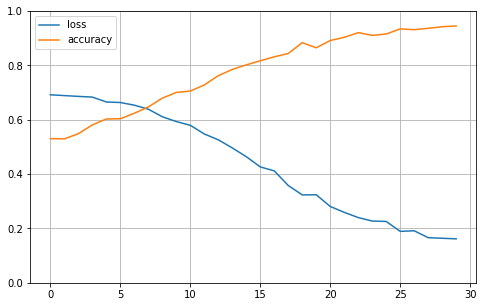

In [52]:
pd.DataFrame(history.history).plot(figsize= (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## use test data

In [53]:
y_pred= model.predict_classes(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [54]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1])

## check accuracy

In [55]:
accuracy= 0

for i in range(len(y_test)):
    if(y_test[i]== y_pred[i]):
        accuracy+= 1
        
print("accuracy: ", accuracy/len(y_test))

accuracy:  0.905
